## Find Frequency Distributions with NLTK (1)

Lab instructor: Zeyang(Jenny) Gong

#### Under blackboard, you can find the following documents: 

•	Installation instruction 

•	Lab1.doc (tutorial that you can go over by yourself after the lab) 

•	Lab1.ipynb (material that will be present during the lab)

•	Frequency.py (code to create frequency distribution) 

•	Frequency without stopwords.py (code to create frequency distribution without stop words) 

•	Input.txt

If you want to follow the instructor during the lab, please get your jupyter notebook ready before the lab. The installation instruction has been posted on the Blackboard. 


Today we will be learning how to use the Natural Language Toolkit (NLTK) module to perform basic text analysis. 

NLTK is a Python add-on package which has multiple useful functions for analyzing text files. One key component of text analysis is finding keyword frequency distributions.

A frequency distribution can be shown as a table containing how many times within a document different words appear. To directly quote the NLTK book, “it’s called a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them” (http://www.nltk.org/book/ch01.html). 

Let’s get started.


## String Manipulation 

In [2]:
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getslice__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_formatter_field_name_split',
 '_formatter_parser',
 'capitalize',
 'center',
 'count',
 'decode',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'index',
 'isalnum',
 'isalpha',
 'isdigit',
 'islower',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [3]:
s = '  Hello '
s

'  Hello '

In [4]:
s = s.strip()
s

'Hello'

In [8]:
#string indexing 
s[0]

'H'

In [6]:
s[-1]

'o'

In [7]:
s[0:4]

'Hell'

In [9]:
s = s.lower()
s

'hello'

In [10]:
s.isalpha()

True

In [11]:
s.isdigit()

False

In [12]:
s = 'http:\\www.abc.com'
s.startswith('http')

True

In [13]:
s = 'I love coding'
s_list = s.split() #default deliminator is ' '(space) 
s_list

['I', 'love', 'coding']

In [17]:
new_string = '$$'.join(s_list)
new_string

'I$$love$$coding'

In [19]:
new_string.replace('$$',' ')

'I love coding'

## Read data

In [20]:
import nltk
from nltk import FreqDist

#read file from local 
f = open('input.txt','rU')
raw = f.read()

In [21]:
type (raw)

str

In [22]:
raw = raw.replace('\n',' ') 
raw = raw.decode('utf8') #decode raw text by utf-8

## Tokenization 

In [23]:
tokens = nltk.word_tokenize(raw)
type(tokens)

list

In [24]:
tokens[:10]

[u'0|0|5|The',
 u'Canon',
 u'Rebel',
 u'T3i',
 u'takes',
 u'the',
 u'consumer',
 u'level',
 u'dSLR',
 u'a']

In [25]:
#change all tokens into lower case 
words1 = [w.lower() for w in tokens]   #list comprehension 

#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]

#encode the raw token list by utf-8
words3 = [w.encode('utf8') for w in words2]

In [ ]:
#another way to create a new list: 
words1 = []
for w in tokens: 
    words1.append(w.lower())


In [26]:
#generate a frequency dictionary for all tokens 
freq = FreqDist(words3)

#sort the frequency list in descending order
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)
sorted_freq

[('the', 163977),
 ('i', 88039),
 ('and', 79796),
 ('a', 74648),
 ('to', 73526),
 ('is', 52932),
 ('it', 51501),
 ('of', 44182),
 ('camera', 43972),
 ('for', 35835),
 ('this', 34021),
 ('with', 33925),
 ('you', 33632),
 ('in', 32506),
 ('that', 29854),
 ('my', 23395),
 ('have', 23055),
 ('on', 20708),
 ('but', 20496),
 ('not', 17820),
 ('are', 16348),
 ('as', 16111),
 ('was', 15144),
 ('lens', 13704),
 ('be', 13293),
 ('if', 12084),
 ('at', 11937),
 ('can', 11899),
 ('so', 11385),
 ('canon', 10863),
 ('nikon', 10776),
 ('or', 10743),
 ('very', 10699),
 ('do', 10351),
 ('more', 10215),
 ('all', 10118),
 ('use', 10113),
 ('great', 9934),
 ('an', 9225),
 ('from', 9151),
 ('has', 9133),
 ('will', 9130),
 ('good', 8571),
 ('get', 8541),
 ('like', 8533),
 ('me', 8441),
 ('one', 8312),
 ('just', 8247),
 ('quality', 8089),
 ('than', 8011),
 ('about', 7997),
 ('pictures', 7910),
 ('out', 7744),
 ('when', 7665),
 ('lenses', 7657),
 ('would', 7384),
 ('had', 7181),
 ('some', 6828),
 ('which', 641

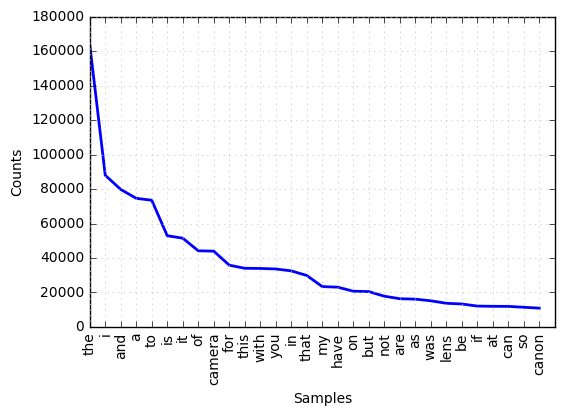

In [27]:
freq.plot(30)

## Stop words removal 

In [28]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english') #use the NLTK stopwords

In [29]:
#only keep the words that not in nltk stopwords word list
words_nostopwords = [w.encode('utf8') for w in words2 if w not in stopwords]

In [30]:
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(words_nostopwords)

#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_freq_nostw

[('camera', 43972),
 ('lens', 13704),
 ('canon', 10863),
 ('nikon', 10776),
 ('use', 10113),
 ('great', 9934),
 ('good', 8571),
 ('get', 8541),
 ('like', 8533),
 ('one', 8312),
 ('quality', 8089),
 ('pictures', 7910),
 ('lenses', 7657),
 ('would', 7384),
 ('better', 6372),
 ('also', 5962),
 ('cameras', 5839),
 ('much', 5807),
 ('really', 5642),
 ('digital', 5601),
 ('take', 5393),
 ('time', 5272),
 ('iso', 5262),
 ('even', 5193),
 ('dslr', 5137),
 ('video', 5079),
 ('well', 5030),
 ('shoot', 5026),
 ('focus', 4807),
 ('still', 4549),
 ('used', 4514),
 ('image', 4504),
 ('flash', 4487),
 ('shots', 4460),
 ('light', 4447),
 ('using', 4419),
 ('photos', 4329),
 ('price', 4296),
 ('first', 4274),
 ('shooting', 4191),
 ('mode', 4134),
 ('slr', 4131),
 ('new', 4089),
 ('want', 4081),
 ('features', 3845),
 ('buy', 3795),
 ('point', 3722),
 ('photography', 3703),
 ('many', 3644),
 ('need', 3604),
 ('body', 3591),
 ('battery', 3509),
 ('easy', 3498),
 ('images', 3462),
 ('manual', 3428),
 ('kit

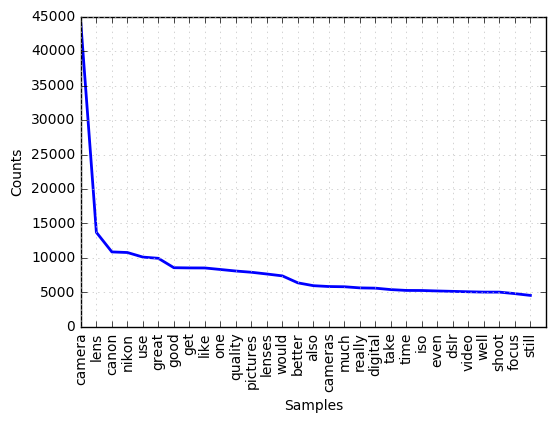

In [31]:
freq_nostw.plot(30)

## Save the result 

In [32]:
with open ('output.txt','a') as outfile:
    for line in sorted_freq_nostw:
        outfile.write(str(line[0])+'\t'+str(line[1])+'\n')

All done!